In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("tested.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Kelly, Mr. James",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [7]:
df[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
4,4,1.000000
3,3,0.666667
2,2,0.606061
1,1,0.538462
7,9,0.500000
0,0,0.305556
5,5,0.000000
6,6,0.000000


In [8]:
df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,1.0
1,male,0.0


In [9]:
df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
5,5,1.000000
6,8,0.500000
1,1,0.490909
2,2,0.428571
0,0,0.310954
3,3,0.250000
4,4,0.250000


In [10]:
df['Age'].fillna(df['Age'].mean()).astype(np.int)

0      34
1      47
2      62
3      27
4      22
       ..
413    30
414    39
415    38
416    30
417    30
Name: Age, Length: 418, dtype: int64

<AxesSubplot:title={'center':'Age'}, xlabel='Survived'>

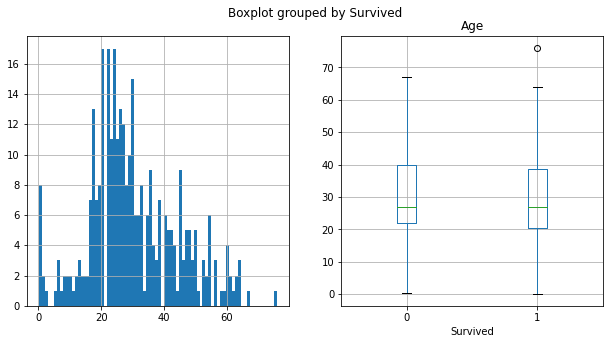

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
df['Age'].hist(bins=80, ax=axes[0])
df.boxplot(column='Age', by='Survived', ax=axes[1])

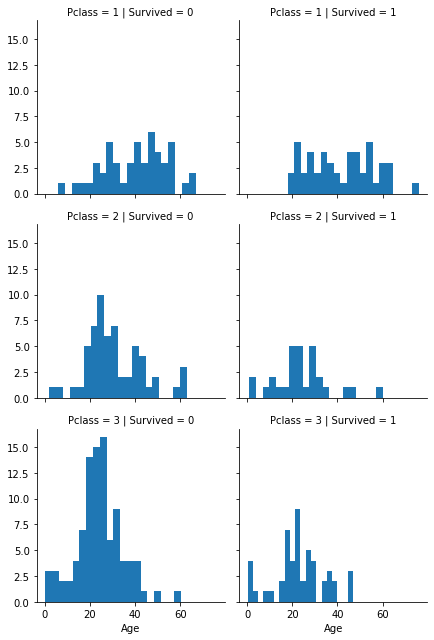

In [14]:
sns.FacetGrid(df, col='Survived', row='Pclass').map(plt.hist, 'Age', bins=20)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

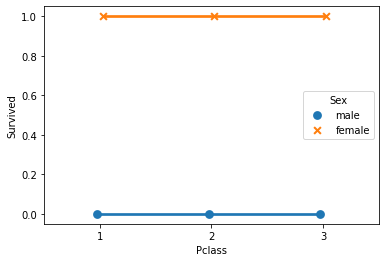

In [15]:
sns.pointplot(x='Pclass', y='Survived', hue='Sex', data=df, dodge=True, join=True, markers=['o', 'x'], linestyle=['--', '-'])

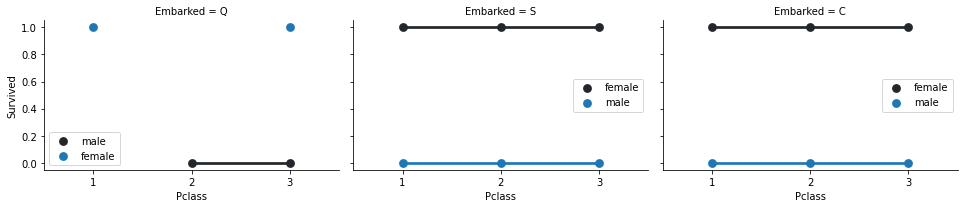

In [16]:
grid = sns.FacetGrid(df, col='Embarked', size=3, aspect=1.5)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex')
[grid.axes[0][i].legend() for i in range(0, 3)]

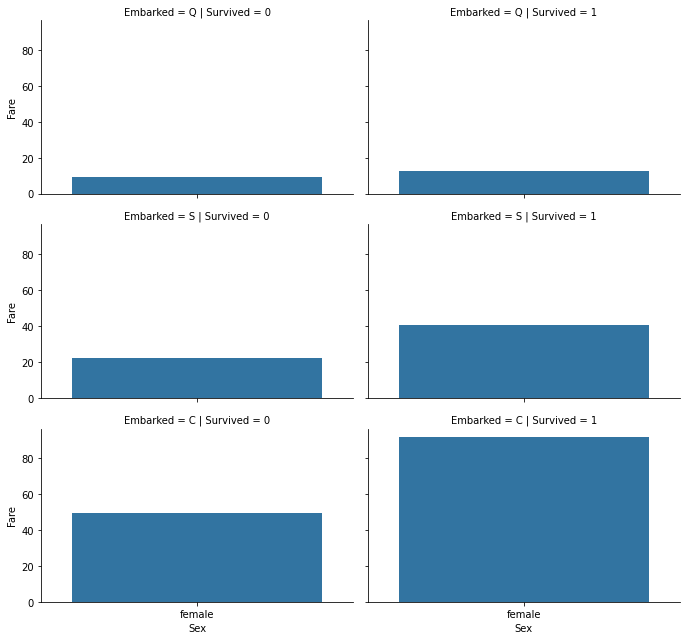

In [17]:
grid = sns.FacetGrid(df, row='Embarked', col='Survived', aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', ci=None)
grid.add_legend()

In [18]:
# remove some useless information
print(f"Before: {df.shape}")
df = df.drop(['Ticket', 'Cabin'], axis=1)
print(f"After: {df.shape}")

Before: (418, 12)
After: (418, 10)


In [19]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


In [20]:
# extract title from name
for d in df:
    df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(df['Title'], df['Sex'])

Sex,female,male
Title,,
Col,0,2
Dona,1,0
Dr,0,1
Master,0,21
Miss,78,0
Mr,0,240
Mrs,72,0
Ms,1,0
Rev,0,2


In [21]:
for d in df:
    df.Title.replace(['Col', 'Dona', 'Dr', 'Master', 'Rev'], 'Rare', inplace=True)
    df.Title.replace('Ms', 'Miss', inplace=True)
df[['Survived', 'Title']].groupby('Title', as_index=False).mean()

,Title,Survived
0,Miss,1.000000
1,Mr,0.000000
2,Mrs,1.000000
3,Rare,0.037037


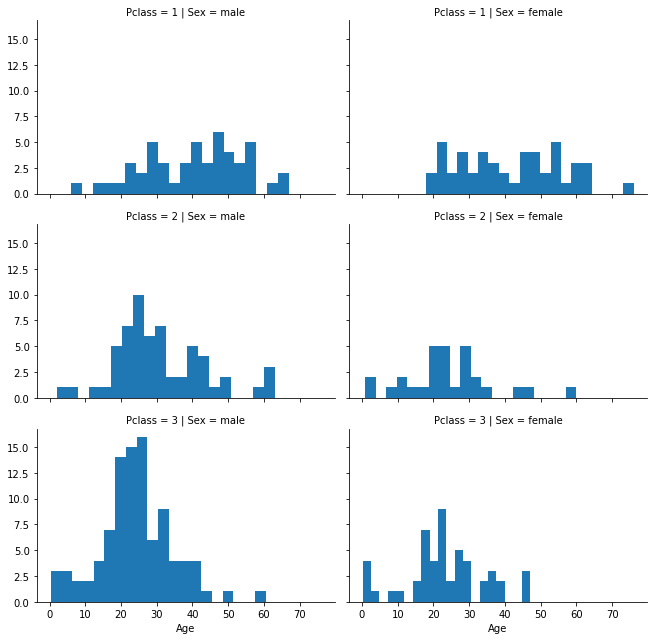

In [22]:
grid = sns.FacetGrid(df, col='Sex', row='Pclass', aspect=1.5).map(plt.hist, 'Age', bins=20).add_legend()


<AxesSubplot:xlabel='Age*Class', ylabel='Survived'>

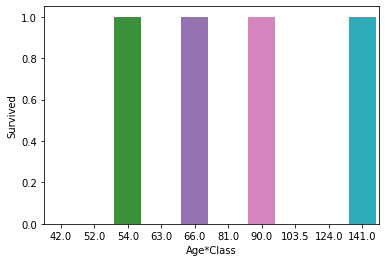

In [26]:
for d in df:
    df['Age*Class'] = df['Age'] * df['Pclass']
sns.barplot(x='Age*Class', y='Survived', data=df.head(10), ci=False)